In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
mobile = keras.applications.mobilenet.MobileNet()

In [4]:
def prepare_image(file):
    img_path = 'MobileNet-inference-images/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims) 

In [ ]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

In [ ]:
%mv M0/ M1/ M2/ M3/ M4/ M5/ train/

In [10]:
%cd dataset

/home/bumbleshet/Documents/Thesis/dataset2


In [11]:
%mkdir valid
%mkdir test

%cd valid
%mkdir M1/ M1/ M2/ M3/ M4/ M5/ M6 M7/ M8/ M9 M10/ M11/ M12/ M13/

%cd ../test
%mkdir M1/ M1/ M2/ M3/ M4/ M5/ M6 M7/ M8/ M9 M10/ M11/ M12/ M13/

/home/bumbleshet/Documents/Thesis/dataset2/valid
mkdir: cannot create directory ‘M1/’: File exists
/home/bumbleshet/Documents/Thesis/dataset2/test
mkdir: cannot create directory ‘M1/’: File exists


In [18]:
%%bash
# cd ../train
for ((i=1; i<=13; i++)); do
    a=$(find M$i/ -type f | shuf -n 30)
    mv $a ../valid/M$i/
    b=$(find M$i/ -type f | shuf -n 5)
    mv $b ../test/M$i/
done

In [21]:
cd ../..

/home/bumbleshet/Documents/Thesis


In [5]:
train_path = 'dataset/train'
validation_path = 'dataset/valid'
test_path = 'dataset/test'

In [34]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(validation_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 8871 images belonging to 13 classes.
Found 390 images belonging to 13 classes.
Found 65 images belonging to 13 classes.


In [35]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [36]:
x = mobile.layers[-6].output
predictions = Dense(13, activation='softmax')(x)

In [37]:
model = Model(inputs=mobile.input, outputs=predictions)

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [39]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [40]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit_generator(train_batches, validation_data=valid_batches, validation_steps=4, steps_per_epoch=89, epochs=90, verbose=2)

Epoch 1/90
 - 21s - loss: 2.3897 - acc: 0.2101 - val_loss: 2.6460 - val_acc: 0.1250
Epoch 2/90
 - 14s - loss: 2.1759 - acc: 0.2461 - val_loss: 2.5460 - val_acc: 0.2250
Epoch 3/90
 - 14s - loss: 2.0371 - acc: 0.2787 - val_loss: 2.8692 - val_acc: 0.1000
Epoch 4/90
 - 14s - loss: 1.9279 - acc: 0.3135 - val_loss: 2.3856 - val_acc: 0.2250
Epoch 5/90
 - 14s - loss: 1.7663 - acc: 0.3854 - val_loss: 2.5798 - val_acc: 0.1500
Epoch 6/90
 - 14s - loss: 1.6924 - acc: 0.4112 - val_loss: 2.4144 - val_acc: 0.2000
Epoch 7/90
 - 14s - loss: 1.5865 - acc: 0.4348 - val_loss: 2.2952 - val_acc: 0.2500
Epoch 8/90
 - 14s - loss: 1.5588 - acc: 0.4921 - val_loss: 2.1213 - val_acc: 0.3000
Epoch 9/90
 - 14s - loss: 1.4503 - acc: 0.5225 - val_loss: 2.2167 - val_acc: 0.1750
Epoch 10/90
 - 14s - loss: 1.4279 - acc: 0.5439 - val_loss: 2.2773 - val_acc: 0.1750
Epoch 11/90
 - 14s - loss: 1.2966 - acc: 0.5584 - val_loss: 2.1325 - val_acc: 0.2500
Epoch 12/90
 - 14s - loss: 1.2738 - acc: 0.5753 - val_loss: 2.3657 - val_a

In [42]:
labels = (train_batches.class_indices)
labels

{'M1': 0,
 'M10': 1,
 'M11': 2,
 'M12': 3,
 'M13': 4,
 'M2': 5,
 'M3': 6,
 'M4': 7,
 'M5': 8,
 'M6': 9,
 'M7': 10,
 'M8': 11,
 'M9': 12}

In [80]:
preprocessed_image = prepare_image('62.JPG')
y_prob = model.predict(preprocessed_image) 
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
predicted_label = sorted(labels)
print(y_classes)
predicted_label[y_classes[0]]

[[5.9023728e-06 8.7691897e-01 2.7747798e-05 2.0523272e-02 9.1808420e-03
  2.9749700e-04 1.1403051e-03 6.4704823e-03 3.7090059e-02 6.3505652e-03
  7.7868844e-03 3.6571389e-03 3.0550318e-02]]
[1]


'M10'

In [55]:
test_labels = test_batches.classes
test_labels

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12],
      dtype=int32)

In [71]:
predictions = model.predict_generator(test_batches, steps=7, verbose=0)

In [72]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [73]:
test_batches.class_indices

{'M1': 0,
 'M10': 1,
 'M11': 2,
 'M12': 3,
 'M13': 4,
 'M2': 5,
 'M3': 6,
 'M4': 7,
 'M5': 8,
 'M6': 9,
 'M7': 10,
 'M8': 11,
 'M9': 12}

In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 2 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 2 0 1]
 [0 0 0 0 0 0 0 0 3 0 0 2 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 3]
 [4 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 2 0 0 0 3]
 [0 0 0 2 0 0 0 0 2 0 1 0 0]
 [0 0 0 0 1 0 0 0 2 0 0 0 2]
 [0 0 0 0 0 4 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 3 0 0 0 0]]


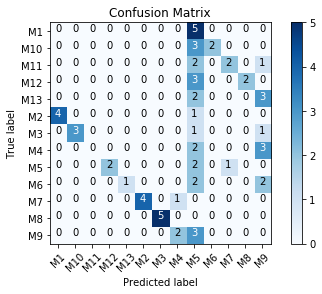

In [75]:
cm_plot_labels = ['M1', 'M10', 'M11', 'M12', 'M13', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8' , 'M9']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')